# Proyecto final

### Álvaro Andrés Esquivel Gómez  -  11002822




y = f(x) = mx +b

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales **buscamos estimar con los datos**, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


Por lo tanto en el proyecto:
y = el precio de venta real de cierta casa
x = cierta característica de cierta casa
yhat = f(x) = precio estimado o predicción del precio de venta para una casa con
cierta característica x
m = pendiente de la recta que usamos para aproximar el precio de la casa yhat
b = intercepto de la recta que usamos para aproximar el precio de la casa yhat

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
#Importando los datos
data = np.load("proyecto_training_data.npy")

print("Rango del tensor:",data.ndim) 
print("Forma o tamaño:",data.shape) 
print(data)
len_data = len(data)
print("\nCantidad de datos:",len_data)


Rango del tensor: 2
Forma o tamaño: (1460, 6)
[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]

Cantidad de datos: 1460


In [5]:
#Asignacion de variables de entrenamiento y de validacion usando sclicing
datos_entrenamiento = data[0:int(len_data*0.8)]


datos_validacion = data[int(len_data*0.8):len_data]


print("Datos entrenamiento: ", datos_entrenamiento, "\n\nlen datos_entrenamiento: ", len(datos_entrenamiento),
      "\n\nDatos validacion: ", datos_validacion, "\n\nlen datos_validacion: ", len(datos_validacion))

print("Forma datos_entrenamiento:",datos_entrenamiento.shape) 
print("Forma datos_entrenamiento:",datos_validacion.shape) 

Datos entrenamiento:  [[2.0850e+05 7.0000e+00 8.5600e+02 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e+05 6.0000e+00 1.2620e+03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e+05 7.0000e+00 9.2000e+02 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e+05 7.0000e+00 1.5020e+03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e+05 8.0000e+00 1.6940e+03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e+05 6.0000e+00 9.5900e+02 7.0000e+00 2.0000e+03 5.8000e+01]] 

len datos_entrenamiento:  1168 

Datos validacion:  [[2.35000e+05 6.00000e+00 1.23600e+03 7.00000e+00 1.93500e+03 1.20000e+02]
 [6.25000e+05 1.00000e+01 1.83100e+03 1.00000e+01 1.99500e+03 1.18000e+02]
 [1.71000e+05 6.00000e+00 1.11800e+03 6.00000e+00 1.97700e+03 7.60000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]] 

len datos_validacion:  292
Forma datos_entrena

Para cada variable en el dataset calcular((usando numpy):
* media
* valor máximo
* valor mínimo
* rango(peak to peak, no el rango del tensor que por ser vector
sabemos que es 1)
* desviación estándar
* Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

Media precio:  180590.27739726027
Precio maximo:  755000.0
Precio minimo:  34900.0
Rango entre minimo y maximo: 720100.0
Desviacion precio: 78781.95108033362


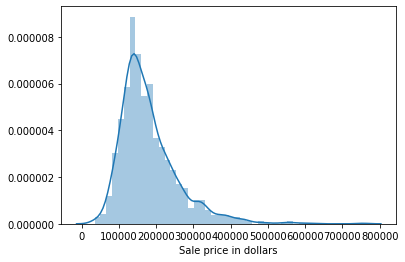

In [6]:
#Variables de dataset entrenamiento
precio = datos_entrenamiento[:,0]
calidad_materiales = datos_entrenamiento[:,1]
pies_primer_nivel = datos_entrenamiento[:,2]
cantidad_cuartos = datos_entrenamiento[:,3]
anio_construccion = datos_entrenamiento[:,4]
pies_calle_n = datos_entrenamiento[:,5]
pies_calle = pies_calle_n[np.logical_not(np.isnan(pies_calle_n))]

print("Media precio: ", np.nanmean(precio))
print("Precio maximo: ", np.nanmax(precio))
print("Precio minimo: ", np.nanmin(precio))
print("Rango entre minimo y maximo:", np.ptp(precio))
print("Desviacion precio:", np.std(precio))

x_var = pd.Series(precio, name="Sale price in dollars")
ax = sns.distplot(x_var)

Valor media de calidad: 6.101027397260274
Valor maximo de calidad: 10.0
Valor minimo de calidad: 1.0
Rango de calidad: 9.0
Desviacion de calidad: 1.377435193240741


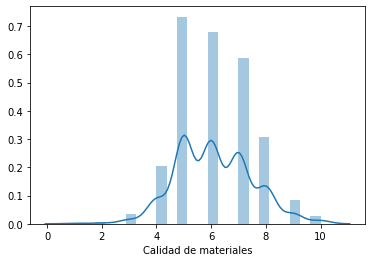

In [7]:
print("Valor media de calidad:", np.nanmean(calidad_materiales))
print("Valor maximo de calidad:", np.nanmax(calidad_materiales))
print("Valor minimo de calidad:", np.nanmin(calidad_materiales))
print("Rango de calidad:", np.ptp(calidad_materiales))
print("Desviacion de calidad:", np.std(calidad_materiales))

x_var = pd.Series(calidad_materiales, name="Calidad de materiales")
ax = sns.distplot(x_var)

Valores de pies cuadrados en el primer nivel
Valor de media: 1156.3236301369864
Valor maximo: 3228.0
Valor minimo: 334.0
Rango entre valor maximo y minimo: 2894.0
Desviacion: 373.620331503586


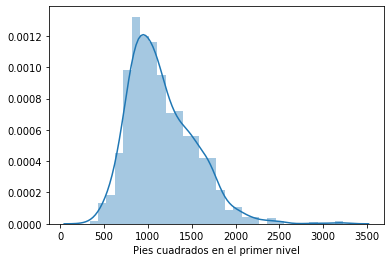

In [8]:
print("Valores de pies cuadrados en el primer nivel")
print("Valor de media:", np.nanmean(pies_primer_nivel))
print("Valor maximo:", np.nanmax(pies_primer_nivel))
print("Valor minimo:", np.nanmin(pies_primer_nivel))
print("Rango entre valor maximo y minimo:", np.ptp(pies_primer_nivel))
print("Desviacion:", np.std(pies_primer_nivel))

x_var = pd.Series(pies_primer_nivel, name="Pies cuadrados en el primer nivel")
ax = sns.distplot(x_var)

Valores de total de habitaciones
Valor de media: 6.4854452054794525
Valor maximo: 14.0
Valor minimo: 2.0
Rango entre valor maximo y minimo: 12.0
Desviacion: 1.6084517167387253


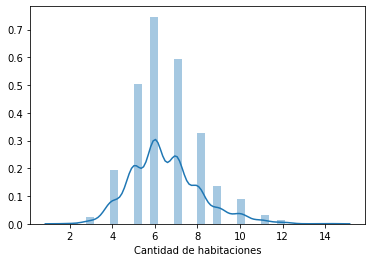

In [9]:
print("Valores de total de habitaciones")
print("Valor de media:", np.nanmean(cantidad_cuartos))
print("Valor maximo:", np.nanmax(cantidad_cuartos))
print("Valor minimo:", np.nanmin(cantidad_cuartos))
print("Rango entre valor maximo y minimo:", np.ptp(cantidad_cuartos))
print("Desviacion:", np.std(cantidad_cuartos))

x_var = pd.Series(cantidad_cuartos, name="Cantidad de habitaciones")
ax = sns.distplot(x_var)

Valores de año de construccion
Valor de media: 1971.451198630137
Valor maximo: 2010.0
Valor minimo: 1875.0
Rango entre valor maximo y minimo: 135.0
Desviacion: 29.93888206867768


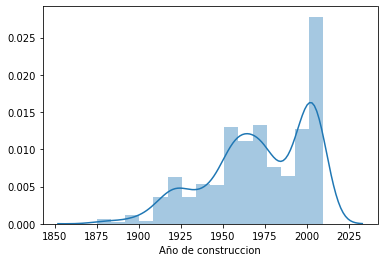

In [10]:
print("Valores de año de construccion")
print("Valor de media:", np.nanmean(anio_construccion))
print("Valor maximo:", np.nanmax(anio_construccion))
print("Valor minimo:", np.nanmin(anio_construccion))
print("Rango entre valor maximo y minimo:", np.ptp(anio_construccion))
print("Desviacion:", np.std(anio_construccion))

x_var = pd.Series(anio_construccion, name="Año de construccion")
ax = sns.distplot(x_var)

Pies lineales de calle conectados a la propiedad
Valor de media: 69.94698544698545
Valor maximo: 313.0
Valor minimo: 21.0
Rango entre valor maximo y minimo: 292.0
Desviacion: 23.4659548199304


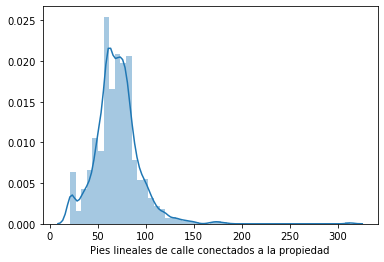

In [11]:
print("Pies lineales de calle conectados a la propiedad")
print("Valor de media:", np.nanmean(pies_calle))
print("Valor maximo:", np.nanmax(pies_calle))
print("Valor minimo:", np.nanmin(pies_calle))
print("Rango entre valor maximo y minimo:", np.ptp(pies_calle))
print("Desviacion:", np.std(pies_calle))

x_var = pd.Series(pies_calle, name="Pies lineales de calle conectados a la propiedad")
ax = sns.distplot(x_var)

En el proyecto:

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

yhat = f(x) = precio estimado o predicción del precio de venta para una casa con cierta característica x

m = pendiente de la recta que usamos para aproximar el precio de la casa yhat

b = intercepto de la recta que usamos para aproximar el precio de la casa yhat

m y b son conocidos como parámetros del modelo y son valores que necesitamos encontrar usando los datos x,y

Correlacion entre calidad de materiales y precio
Coeficiente:  0.7939900504626405


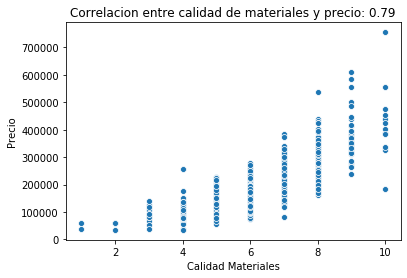

In [12]:
coefcorr_calidad_materiales = np.corrcoef(calidad_materiales, precio)[1,0]
print("Correlacion entre calidad de materiales y precio")
print("Coeficiente: ", coefcorr_calidad_materiales)
titulo = "Correlacion entre calidad de materiales y precio: " + str("%.2f" % round(coefcorr_calidad_materiales, 2))
dataset = pd.DataFrame({'Calidad Materiales': calidad_materiales, 'Precio': precio})
ax = sns.scatterplot(x="Calidad Materiales", y="Precio", data=dataset).set_title(titulo)

Correlacion entre pies en el primer nivel y precio
Coeficiente:  0.6162887000998717


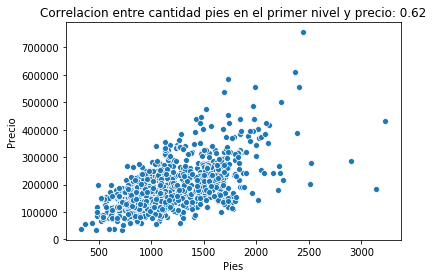

In [13]:
coefcorr_pies = np.corrcoef(pies_primer_nivel, precio)[1,0]
print("Correlacion entre pies en el primer nivel y precio")
print("Coeficiente: ", coefcorr_pies)
titulo = "Correlacion entre cantidad pies en el primer nivel y precio: " + str("%.2f" % round(coefcorr_pies, 2))
dataset = pd.DataFrame({'Pies': pies_primer_nivel, 'Precio': precio})
ax = sns.scatterplot(x="Pies", y="Precio", data=dataset).set_title(titulo)

Correlacion entre cantida de cuartos y precio
Coeficiente:  0.5647069399593065


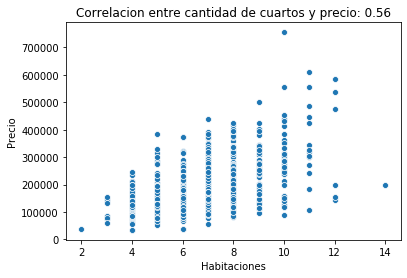

In [14]:
coefcorr_cuartos = np.corrcoef(cantidad_cuartos, precio)[1,0]
print("Correlacion entre cantida de cuartos y precio")
print("Coeficiente: ", coefcorr_cuartos)
titulo = "Correlacion entre cantidad de cuartos y precio: " + str("%.2f" % round(coefcorr_cuartos, 2))
dataset = pd.DataFrame({'Habitaciones': cantidad_cuartos, 'Precio': precio})
ax = sns.scatterplot(x="Habitaciones", y="Precio", data=dataset).set_title(titulo)

Correlacion entre año de construccion y precio
Coeficiente:  0.5647069399593065


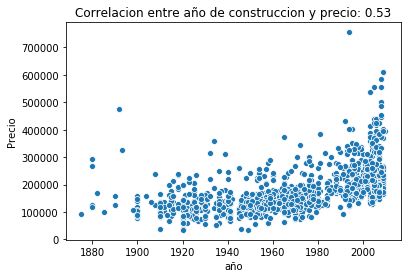

In [15]:
coefcorr_anio = np.corrcoef(anio_construccion, precio)[1,0]
print("Correlacion entre año de construccion y precio")
print("Coeficiente: ", coefcorr_cuartos)
titulo = "Correlacion entre año de construccion y precio: " + str("%.2f" % round(coefcorr_anio, 2))
dataset = pd.DataFrame({'año': anio_construccion, 'Precio': precio})
ax = sns.scatterplot(x="año", y="Precio", data=dataset).set_title(titulo)

Correlacion entre Pies lineales de calle conectados a la propiedad y precio
Coeficiente:  0.3632916166538923


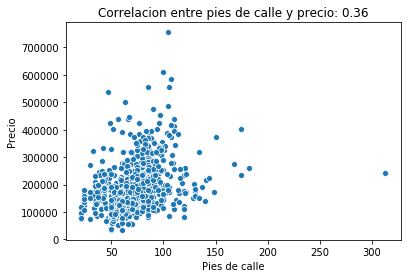

In [16]:
dataset = pd.DataFrame({'Pies de calle': pies_calle_n, 'Precio': precio})
cor = dataset.corr()
coefcorr_calle = cor.loc['Pies de calle','Precio']
print("Correlacion entre Pies lineales de calle conectados a la propiedad y precio")
print("Coeficiente: ", coefcorr_calle)
titulo = "Correlacion entre pies de calle y precio: " + str("%.2f" % round(coefcorr_calle, 2))

ax = sns.scatterplot(x="Pies de calle", y="Precio", data=dataset).set_title(titulo)

Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.
La función recibe como argumentos:
* vector con la variable independiente “x” ,
* vector con la variable dependiente “y”,
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero “imprimir_error_cada” , que nos indica cada cuantas iteraciones queremos imprimir a través de print : el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50
* escalar lr(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [17]:
#Relacion entre cantidad de pies de construccion y costo: 0.62

#y = el precio de venta real de cierta casa

#x = cierta característica de cierta casa

#precio = datos_entrenamiento[:,0]
#pies_primer_nivel = datos_entrenamiento[:,2]

vec_x = np.ones((len(pies_primer_nivel),2))
vec_x[:,0] = pies_primer_nivel
ceros = np.zeros_like(pies_primer_nivel) 
#print(vec_x)
#print(ceros)


def calcular_parametros(x,y):
    media_x = np.nanmean(x)
    media_y = np.nanmean(y)
    #Pendiente
    m = (((media_x * media_y) - (np.nanmean(x*y))) / ((media_x * media_x) - np.nanmean(x*x)))
    #Intercepto
    b = (media_y - (m * media_x))
    return m, b

def entrenar_modelo(x, y, epochs, imprimir_error_cada, lr):    
    modelo_dic = {}
    m, b = np.array(calcular_parametros(x,y))
    print("Parametros iniciales: ",m, b)
    v_errores = np.zeros(epochs)
    
    for i in range(0, epochs):
        lista_ite = [] #0.yhat 1.gradiente_m 2.gradiente_b

        observacion = np.column_stack((x, y))
        #print("Observacion:", observacion)
               
        yhat = (m*x) + b 
        #print("\n\nyhat:", yhat, len(yhat), len(y))
        
        lista_ite.append(yhat)

        error = (np.average((y - yhat)**2) / 2)
        #print("error: ", error)
        v_errores[i] = error 
        
        
        y_res = yhat - y
        #print("y_res: yhat - y ", y_res, y_res.shape)
        
        tempo = y_res * x
        #print("TEMPO: ",tempo)
        
        tempoint = tempo.astype(np.int64)
        gradiente_m = np.average(tempoint)
        #print("gradiente_m:", gradiente_m)
        
        
        gradiente_b = np.average(y_res.astype(np.int64))
        
        #print("gradiente_b", gradiente_b)
        
        lista_ite.append(gradiente_m)
        lista_ite.append(gradiente_b)
        #para m
        m = (m - (lr * gradiente_m))
        #para b
        b = (b - (lr * gradiente_b))
        #print("Parametros nuevos: ",m, b)
        #print("lista_ite:", lista_ite)
        modelo_dic[i] = lista_ite
        #print("Modelo dic:", modelo_dic)
        
        if((i%imprimir_error_cada) == 0):
            print("Error", i, ": ", error)
            #print("Gradiente Multi:",gradientes)
            #print("Gradiente m:", gradiente_m, " b: ", gradiente_b)
            #print("Parametros nuevos: ",parametros)
    

    return modelo_dic, v_errores

#modelo_prediccion = entrenar_modelo(pies_primer_nivel, precio,10,2,10)
#print(modelo_prediccion)
#entrenar_modelo(x,               y,    epochs, imprimir_error_cada, lr)
entrenar_modelo(pies_primer_nivel, precio, 100 , 10, 0.0001)

Parametros iniciales:  129.95124228715702 30324.58517496381
Error 0 :  1924628861.9600515
Error 10 :  3.1181632354336036e+34
Error 20 :  6.001818369377663e+37
Error 30 :  2.4577395402619536e+38
Error 40 :  5.573700309641709e+38
Error 50 :  9.947855807922196e+38
Error 60 :  1.558019746816404e+39
Error 70 :  2.2470724789571948e+39
Error 80 :  3.0619437772145914e+39
Error 90 :  4.0026336415885934e+39


({0: [array([141562.84857277, 194323.05294136, 149879.72807915, ...,
          225511.35109027, 250461.98960941, 154947.82652835]),
   -0.0684931506849315,
   -0.09931506849315068],
  1: [array([141562.85444572, 194323.06159512, 149879.73439045, ...,
          225511.36138788, 250462.00122208, 154947.83310677]),
   10.01626712328767,
   -0.08304794520547945],
  2: [array([141561.99706155, 194321.79755052, 149878.81290218, ...,
          225509.85695286, 250460.30447473, 154946.87255506]),
   -1469.0248287671234,
   -1.2482876712328768],
  3: [array([141687.74571173, 194507.18860874, 150013.96331125, ...,
          225730.50460697, 250709.15740556, 155087.75216097]),
   215458.5419520548,
   168.60616438356163],
  4: [array([123244.47766001, 167316.30375377, 130191.76059105, ...,
          193368.61474515, 214210.46353826, 134425.26112715]),
   -31600817.07020548,
   -24745.17551369863],
  5: [array([2828276.89338715, 4155341.89253125, 3037469.4055675 , ...,
          4939813.81320757, 

“x” el número de iteración y en el eje “y” el error para esa iteración

In [18]:
#t = np.arange(modelo_prediccion.iloc[:, 0])
#s = np.arange(0,len(t),1)

#print(t, s)

modelo_prediccion.plot(x='interacion', y='error')

#ax.set(xlabel='iteraccion', ylabel='error',
  #     title='Algo de titulo')
#ax.grid()
plt.show()



NameError: name 'modelo_prediccion' is not defined

Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal.

y = el precio de venta real de cierta casa

x = cierta característica de cierta casa

In [51]:
#Relacion entre cantidad de pies de construccion y costo: 0.62

#Usando scikit-learn

#Variables de dataset entrenamiento
#precio = datos_entrenamiento[:,0]
#calidad_materiales = datos_entrenamiento[:,1]
#pies_primer_nivel = datos_entrenamiento[:,2]
#cantidad_cuartos = datos_entrenamiento[:,3]
#anio_construccion = datos_entrenamiento[:,4]
#pies_calle_n = datos_entrenamiento[:,5]
#pies_calle = pies_calle_n[np.logical_not(np.isnan(pies_calle_n))]

x = pies_primer_nivel
x_p = datos_validacion[:,2]
y = precio
x_eval = x.reshape(-1,1)
y_eval = y.reshape(-1,1)
x_pruebas = x_p.reshape(-1,1)

#print(x, y)
regre = LinearRegression()  
regre.fit(x_eval, y_eval)
b = regre.intercept_
print("Intercepto:",b)
m = regre.coef_
print("Pendiente:",m)

y_pred = regre.predict(x_pruebas)
df = pd.DataFrame({'Actual': x_pruebas.flatten(), 'Predicted': y_pred.flatten()})
df.describe()



Intercepto: [30324.58517496]
Pendiente: [[129.95124229]]


,Actual,Predicted
count,292.000000,292.000000
mean,1187.839041,184685.744203
std,433.843272,56378.472102
min,483.000000,93091.035200
25%,881.250000,144844.117441
50%,1106.000000,174050.659145
75%,1407.750000,213263.446505
max,4692.000000,640055.813986


In [53]:
df

,Actual,Predicted
0,1236.0,190944.320642
1,1831.0,268265.309803
2,1118.0,175610.074052
3,1261.0,194193.101699
4,625.0,111544.111604
...,...,...
287,953.0,154168.119075
288,2073.0,299713.510436
289,1188.0,184706.661012
290,1078.0,170412.024361


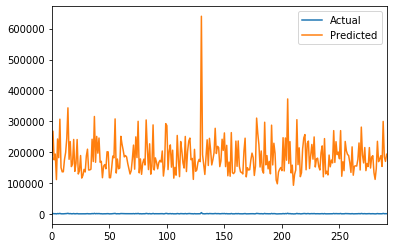

In [52]:
df1 = df.head(25)
df.plot()
plt.show()
